### Regression model result

In [3]:
import numpy as np
import random
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score
from xgboost import XGBClassifier
import os
from sklearn.feature_selection import RFECV
import pandas as pd
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
    KFold,
)
from sklearn.metrics import f1_score, mean_squared_error, mean_absolute_error
import numpy as np
from numpy.lib.function_base import average
import pandas as pd
import matplotlib.pyplot as plt

from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import (
    recall_score,
    f1_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
    KFold,
)
from sklearn.feature_selection import SelectKBest, SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import importlib
import os
from sklearn.feature_selection import (
    SelectKBest,
    RFE,
    mutual_info_regression,
    f_regression,
    mutual_info_classif,
)
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance
import xgboost as xgb
import random
import pickle
import openpyxl
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import pickle
from sklearn.linear_model import LinearRegression
import geopandas as gpd
import random
import importlib
import seaborn as sns
import pandas as pd
import numpy as np

In [135]:
wor_dir="/home/fbf/"
os.chdir(wor_dir)

cdir = os.getcwd()

In [36]:
file_name = "models/output/v1/df_predicted_xgb_regr.csv"
path = os.path.join(cdir, file_name)
df_predicted_xgb_regr=pd.read_csv(path)

file_name = "models/output/v1/df_predicted_rf_regr1.csv"
path = os.path.join(cdir, file_name)
df_predicted_rf_regr=pd.read_csv(path)

file_name = "models/output/v1/df_predicted_mean.csv"
path = os.path.join(cdir, file_name)
df_predicted_mean=pd.read_csv(path)
file_name = "models/output/v1/df_predicted_lr.csv"
path = os.path.join(cdir, file_name)
df_predicted_lr=pd.read_csv(path)



file_name = "models/output/v1/df_predicted_damagecurve.csv"
path = os.path.join(cdir, file_name)
df_predicted_damagecurve=pd.read_csv(path)
df_predicted_damagecurve=df_predicted_damagecurve[df_predicted_damagecurve['typhoon'].isin(list(df_predicted_lr.typhoon.values))]

### Model performance validation per typhoon event (only part of the data is used for model training)
1) Average Performance of different models 

In [37]:
### Results 

models = {
    "Random Forest": df_predicted_rf_regr,
    "XGBoost": df_predicted_xgb_regr,
    "Average": df_predicted_mean,
    "Simple Linear Regression": df_predicted_lr,
    "UPCL damage curve": df_predicted_damagecurve,
}

mae = []
rmse = []

# add 'list' if error
for df_temp in models.values():
    mae.append(mean_absolute_error(df_temp["actual"], df_temp["predicted"]))
    rmse.append(mean_squared_error(df_temp["actual"], df_temp["predicted"], squared=False))

df_results_regr = pd.DataFrame({"Models": list(models.keys()), "MAE": mae, "RMSE": rmse})
display(df_results_regr)

,Models,MAE,RMSE
0,Random Forest,5.950637,13.299146
1,XGBoost,5.669868,13.795844
2,Average,8.266323,15.864480
3,Simple Linear Regression,8.102919,14.302110
4,UPCL damage curve,6.448485,15.120442


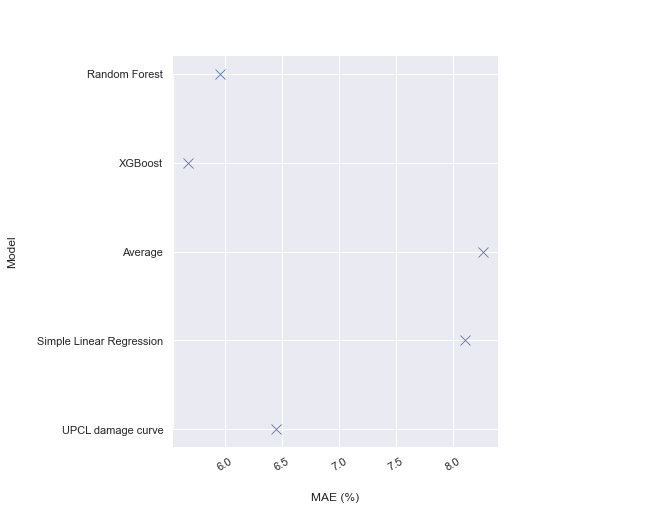

In [145]:
g = sns.relplot(data=df_results_regr,y="Models", x="MAE",palette="colorblind", marker="x", s=100)
g.set_axis_labels("MAE (%)","Model", labelpad=20) 
g.figure.set_size_inches(8.5, 6.5)
g.set_xticklabels(rotation=30)
g.ax.margins(.05)
g.despine(trim=True) 
g.add_legend(frameon=False)
g.legend.set_bbox_to_anchor((1.21, 1.06))

In [ ]:
### compare performance per typhoon event

In [38]:
mae1 = []
rmse1= []

# add 'list' if error
for df_temp in models.values():
    mae = {}
    rmse = {}
    for name, group in  df_temp.groupby('typhoon'):     
        mae[name]=mean_absolute_error(group["actual"], group["predicted"])
        rmse[name]=mean_squared_error(group["actual"], group["predicted"], squared=False)
    mae1.append(mae)
    rmse1.append(rmse1)
    
df = pd.DataFrame(mae1)
df.index=models.keys()
dff=df.unstack() 
dff.index = dff.index.set_names(['typhoon', 'Model'])
reset_df = dff.reset_index()
reset_df=reset_df.rename(columns={0:'MAE'})


2) perfromance per typhoon event 

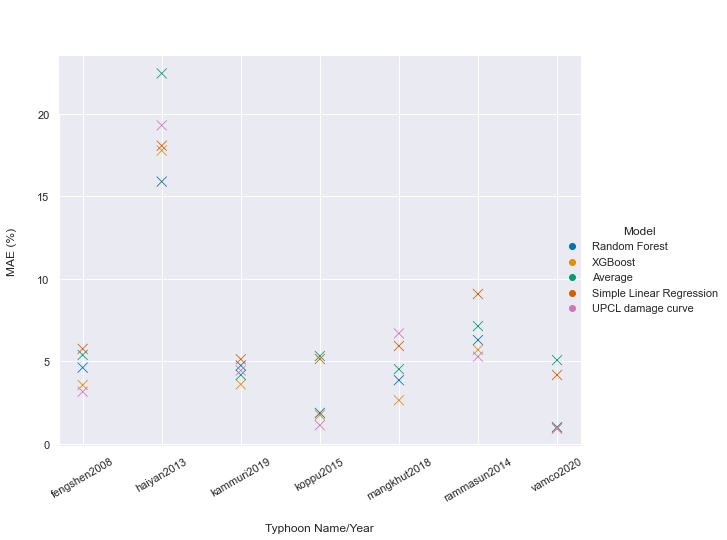

In [136]:
 
g=sns.relplot(
    data=reset_df,
    x="typhoon", y="MAE", hue="Model", palette="colorblind", marker="x", s=100
)
g.set_axis_labels("Typhoon Name/Year", "MAE (%)", labelpad=20)
g.legend.set_title("Model")
g.figure.set_size_inches(8.5, 6.5)
g.set_xticklabels(rotation=30)
g.ax.margins(.05)
g.despine(trim=True) 
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((1.21, 1.06))